###### Accuracy Obtained from the Algorithms used.

1)Logistic Regression --  80.73 %

2)Support Vector Classifier -- 78.53 %

3)Decision Tree -- 77.46 %

4)Random Forest -- 85.4 %

5)Bagging Classifier -- 84.2 %

6)AdaBoost Classifier -- 84.6 %

7)Gradient Bosoting Classifier -- 85.06 %

8)XGBoost Classifier -- 84.53 %

## Importing Libraries for Data Cleaning, Preprocessing,Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#importing the data set
df=pd.read_csv("https://internships-data.s3.ap-south-1.amazonaws.com/Projects/Data/CreditCard_Churning.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape


(10000, 14)

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## Attribute Information

###### RowNumber

###### CustomerId

###### Surname

###### CreditScore

###### Geography

###### Gender

###### Age

###### Tenure

###### Balance

###### NumOfProducts

###### HasCrCard

###### IsActiveMember

###### EstimatedSalary

###### Exited

In [ ]:
#Checking the null values

df.isnull().sum().sum()

0

##### There are no NULL values in the dataset.

### Statistical Analysis

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


<AxesSubplot:>

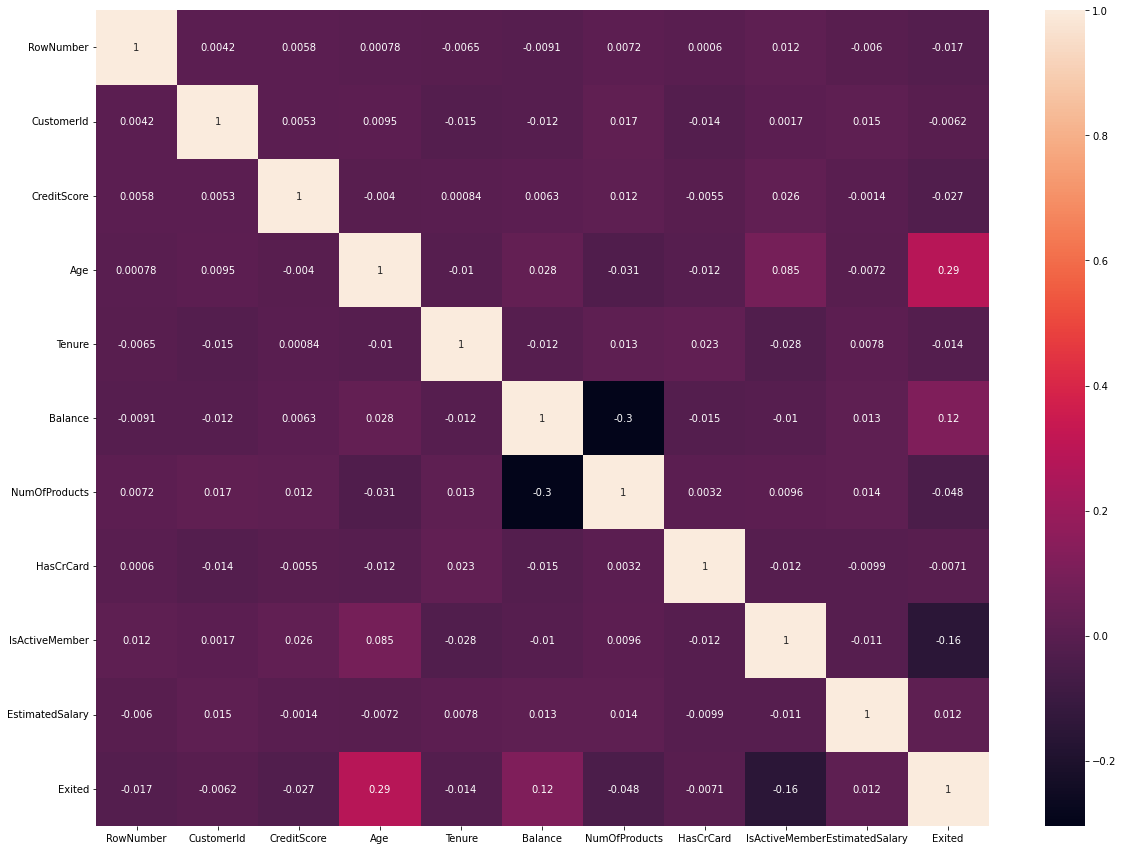

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.cov()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,8.334167e+06,8.725960e+05,1629.568557,23.695370,-54.227223,-1.633226e+06,12.167717,0.787929,17.378388,-9.942442e+05,-19.268377
CustomerId,8.725960e+05,5.174815e+09,36905.141215,7164.938021,-3096.345023,-5.574297e+07,710.137218,-459.904002,59.861288,6.317611e+07,-181.026889
CreditScore,1.629569e+03,3.690514e+04,9341.860157,-4.019150,0.235355,3.780408e+04,0.687999,-0.240492,1.239139,-7.694701e+03,-1.054722
Age,2.369537e+01,7.164938e+03,-4.019150,109.994084,-0.303229,1.852533e+04,-0.187157,-0.056036,0.448026,-4.343373e+03,1.205250
Tenure,-5.422722e+01,-3.096345e+03,0.235355,-0.303229,8.364673,-2.211395e+03,0.022616,0.029773,-0.040997,1.294687e+03,-0.016309
Balance,-1.633226e+06,-5.574297e+07,37804.076998,18525.333354,-2211.394696,3.893436e+09,-11039.815064,-422.619801,-314.483074,4.592389e+07,2978.931708
NumOfProducts,1.216772e+01,7.101372e+02,0.687999,-0.187157,0.022616,-1.103982e+04,0.338322,0.000844,0.002794,4.751478e+02,-0.011203
HasCrCard,7.879288e-01,-4.599040e+02,-0.240492,-0.056036,0.029773,-4.226198e+02,0.000844,0.207791,-0.002703,-2.604105e+02,-0.001310
IsActiveMember,1.737839e+01,5.986129e+01,1.239139,0.448026,-0.040997,-3.144831e+02,0.002794,-0.002703,0.249797,-3.282927e+02,-0.031429
EstimatedSalary,-9.942442e+05,6.317611e+07,-7694.701048,-4343.372926,1294.686597,4.592389e+07,475.147781,-260.410522,-328.292660,3.307457e+09,280.204670


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#rownumber,surname,customer id dont play any role 
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

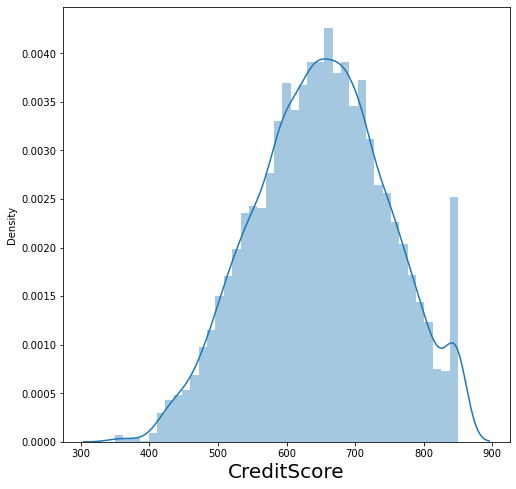

In [ ]:
# Checking the distribution of the features

plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(df['CreditScore'])
plt.xlabel('CreditScore',fontsize=20)
plt.show()

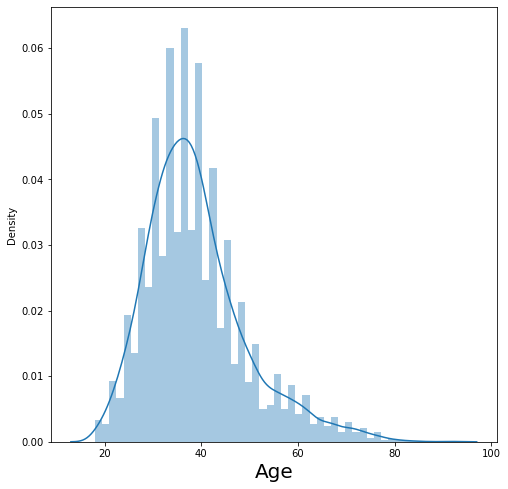

In [ ]:
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(df['Age'])
plt.xlabel('Age',fontsize=20)
plt.show()

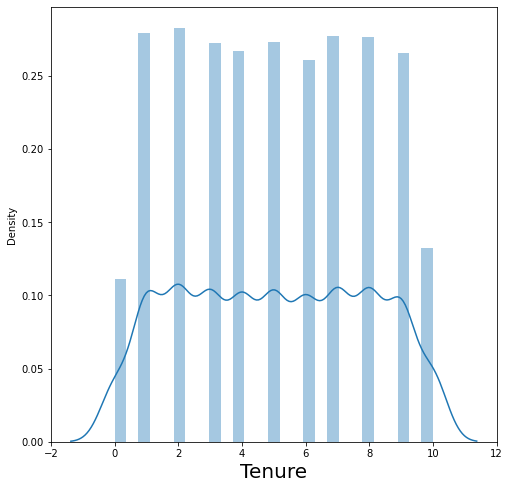

In [ ]:
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(df['Tenure'])
plt.xlabel('Tenure',fontsize=20)
plt.show()

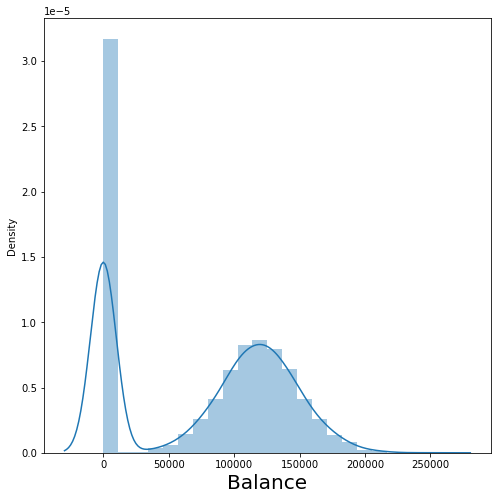

In [ ]:
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(df['Balance'])
plt.xlabel('Balance',fontsize=20)
plt.show()

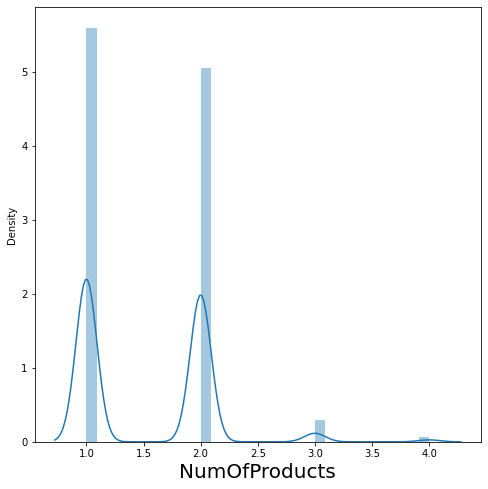

In [ ]:
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(df['NumOfProducts'])
plt.xlabel('NumOfProducts',fontsize=20)
plt.show()

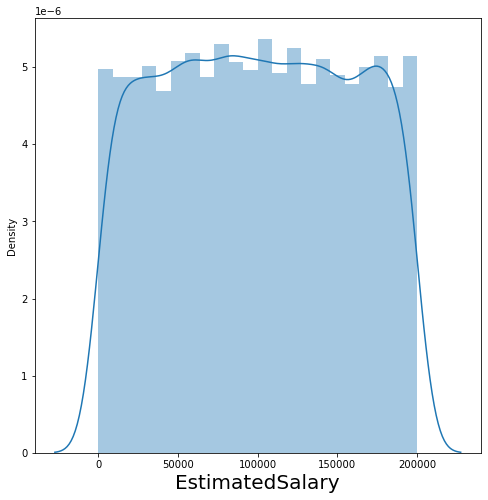

In [ ]:
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(df['EstimatedSalary'])
plt.xlabel('EstimatedSalary',fontsize=20)
plt.show()

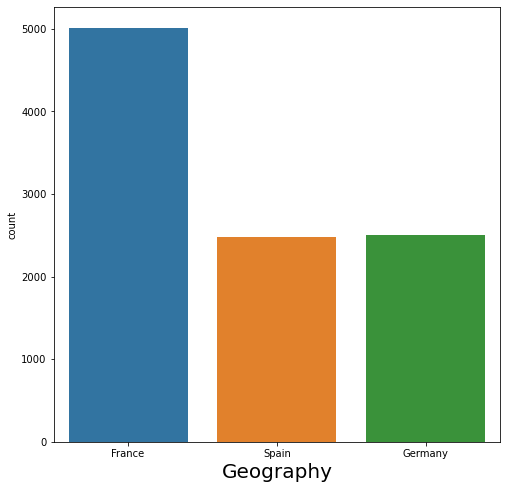

In [ ]:
plt.figure(figsize=(8,8),facecolor='white')
sns.countplot(df['Geography'])
plt.xlabel('Geography',fontsize=20)
plt.show()

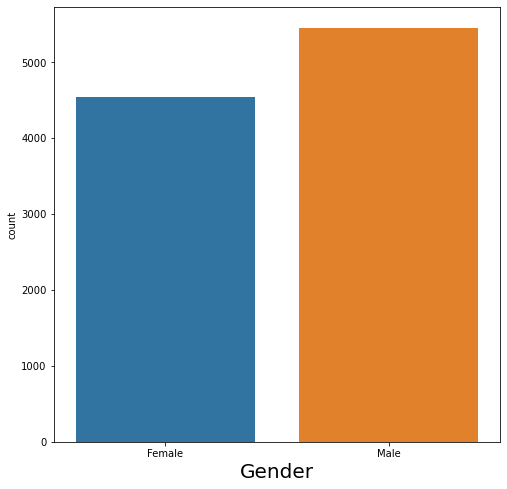

In [ ]:
plt.figure(figsize=(8,8),facecolor='white')
sns.countplot(df['Gender'])
plt.xlabel('Gender',fontsize=20)
plt.show()

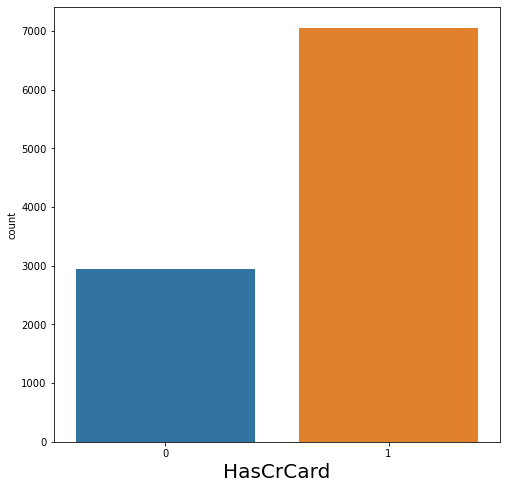

In [ ]:
plt.figure(figsize=(8,8),facecolor='white')
sns.countplot(df['HasCrCard'])
plt.xlabel('HasCrCard',fontsize=20)
plt.show()

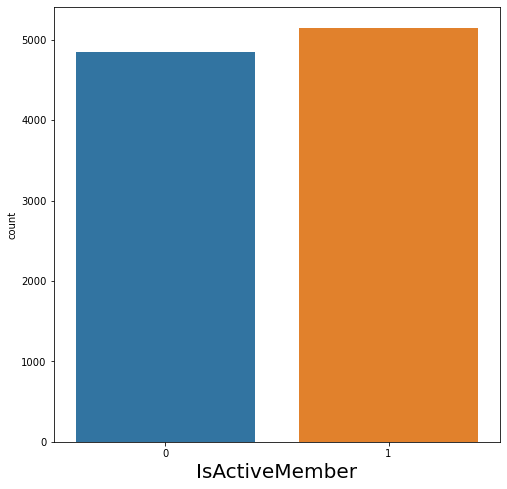

In [ ]:
plt.figure(figsize=(8,8),facecolor='white')
sns.countplot(df['IsActiveMember'])
plt.xlabel('IsActiveMember',fontsize=20)
plt.show()

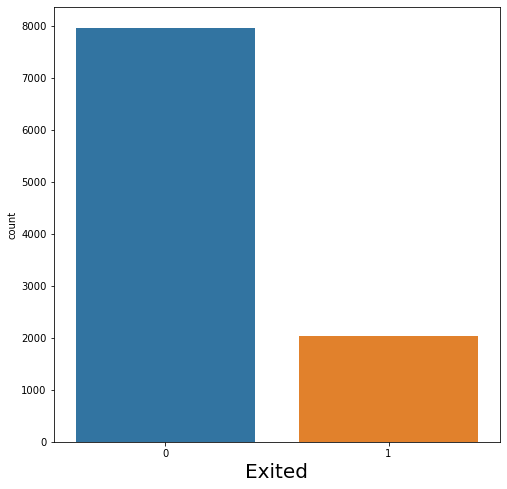

In [ ]:
plt.figure(figsize=(8,8),facecolor='white')
sns.countplot(df['Exited'])
plt.xlabel('Exited',fontsize=20)
plt.show()

In [ ]:
#function to detect outliers
def outlier_thresholds(df,var):
    Q1=df[var].quantile(0,10)
    Q3=df[var].quantile(0,90)
    IQR=Q3-Q1
    up_limit=Q3+1.5+IQR
    low_limit=Q1-1.5+IQR
    return low_limit,up_limit

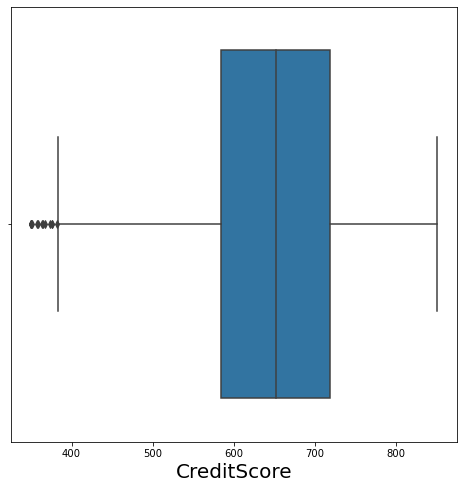

In [ ]:
#Creating Boxplots for outlier detection
plt.figure(figsize=(8,8))
sns.boxplot(df['CreditScore'])
plt.xlabel('CreditScore',fontsize=20)
plt.show()


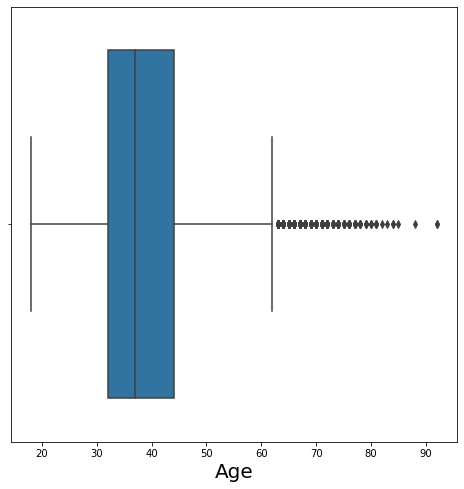

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(df['Age'])
plt.xlabel('Age',fontsize=20)
plt.show()

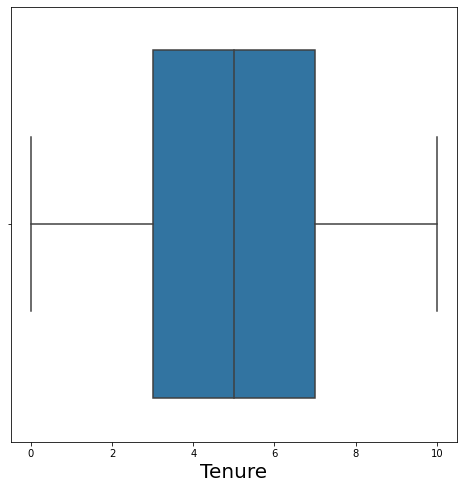

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(df['Tenure'])
plt.xlabel('Tenure',fontsize=20)
plt.show()

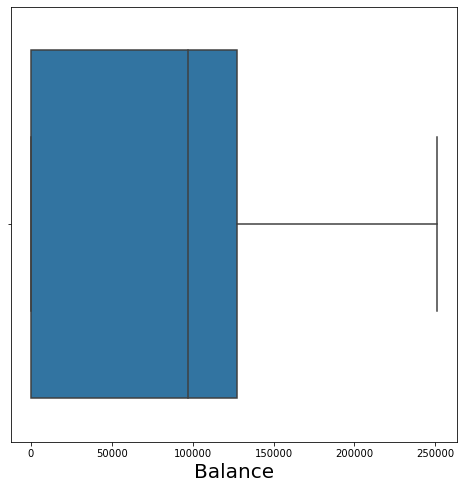

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(df['Balance'])
plt.xlabel('Balance',fontsize=20)
plt.show()

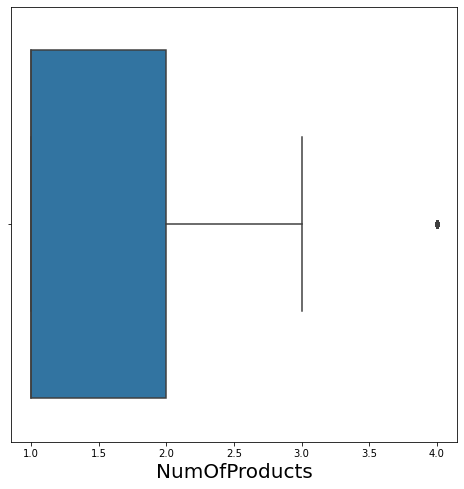

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(df['NumOfProducts'])
plt.xlabel('NumOfProducts',fontsize=20)
plt.show()

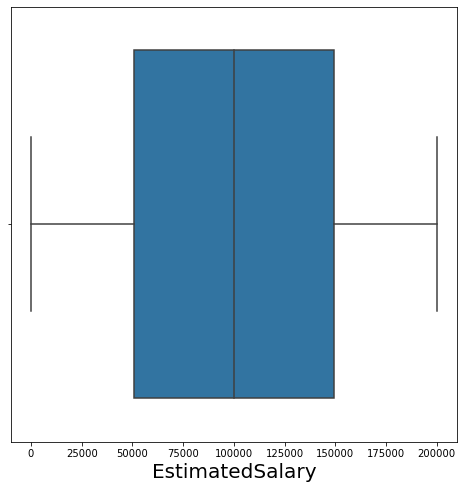

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(df['EstimatedSalary'])
plt.xlabel('EstimatedSalary',fontsize=20)
plt.show()

In [ ]:
df1=df.copy()
def remove_outliers_IQR(col):
    percentile25=df1[col].quantile(0.25)
    percentile75=df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr=percentile75-percentile25
    upper_limit=percentile75+1.5*iqr
    lower_limit=percentile25-1.5*iqr
    print("upper limit",upper_limit)
    print("lower limit",lower_limit)
    df1[col]=np.where(df1[col]>upper_limit,upper_limit,np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col]>upper_limit]

In [ ]:
remove_outliers_IQR('CreditScore')

percentile25 584.0
percentile75 718.0
upper limit 919.0
lower limit 383.0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
remove_outliers_IQR('Age')

percentile25 32.0
percentile75 44.0
upper limit 62.0
lower limit 14.0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
remove_outliers_IQR('Tenure')

percentile25 3.0
percentile75 7.0
upper limit 13.0
lower limit -3.0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
remove_outliers_IQR('Balance')

percentile25 0.0
percentile75 127644.24
upper limit 319110.60000000003
lower limit -191466.36000000002


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
remove_outliers_IQR('NumOfProducts')

percentile25 1.0
percentile75 2.0
upper limit 3.5
lower limit -0.5


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
remove_outliers_IQR('EstimatedSalary')

percentile25 51002.11
percentile75 149388.2475
upper limit 296967.45375
lower limit -96577.09624999999


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
def create_comparision_plot(df,df1,column):
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])
    
    plt.subplot(2,2,2)
    sns.boxplot(df[column])
    
    plt.subplot(2,2,3)
    sns.distplot(df1[column])
    
    plt.subplot(2,2,4)
    sns.boxplot(df1[column])
    
    plt.show()

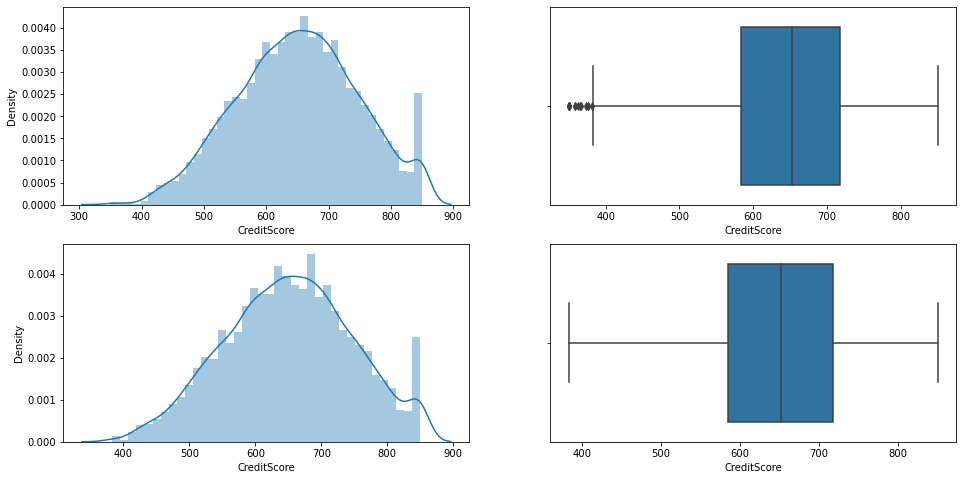

In [ ]:
create_comparision_plot(df,df1,'CreditScore')

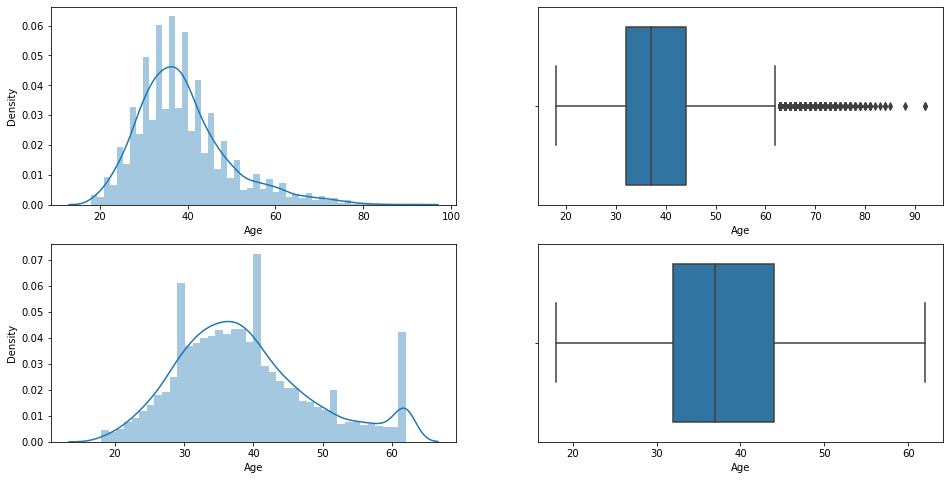

In [ ]:
create_comparision_plot(df,df1,'Age')

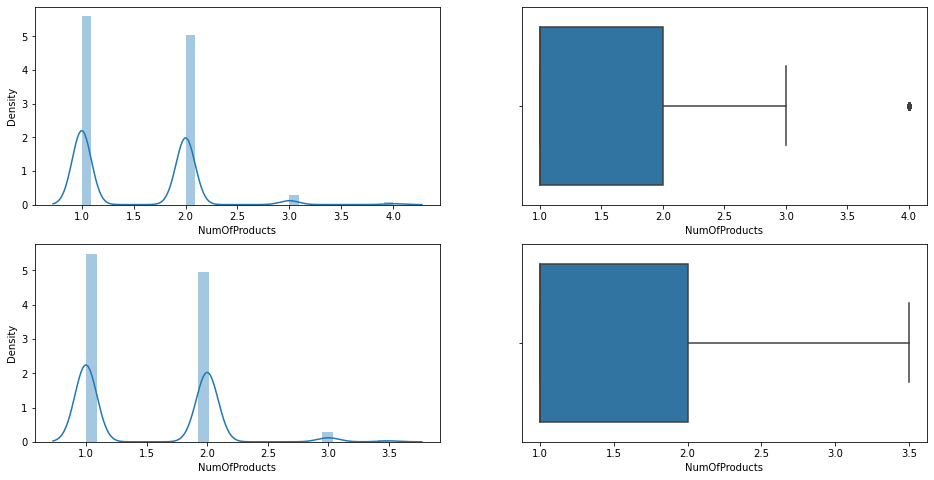

In [ ]:
create_comparision_plot(df,df1,'NumOfProducts')

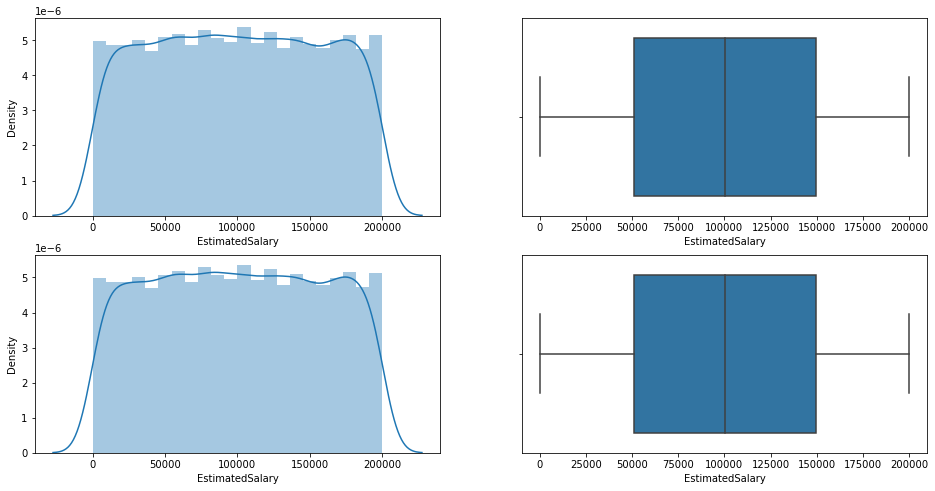

In [ ]:
create_comparision_plot(df,df1,'EstimatedSalary')

### Compare Skewness

In [ ]:
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [ ]:
df1.skew()

CreditScore       -0.064255
Age                0.630315
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.567245
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

##### Skewness is reduced after we have removed outliers using IQR method

### Splitting the dataset into dependent and independent features

In [ ]:
X=df1.drop(columns=['Exited'])
y=df1['Exited']

###  Relationship between dependent and independent features

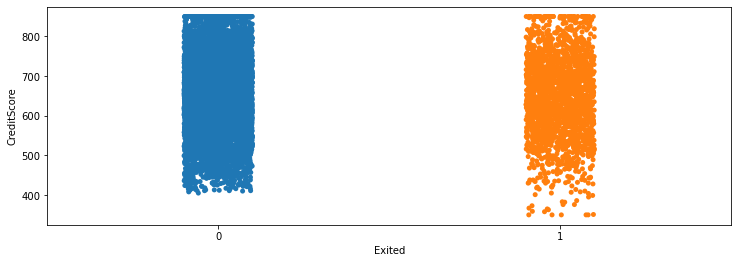

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plt.subplot(7,2,1)
sns.stripplot(y,df['CreditScore'])
plt.tight_layout()

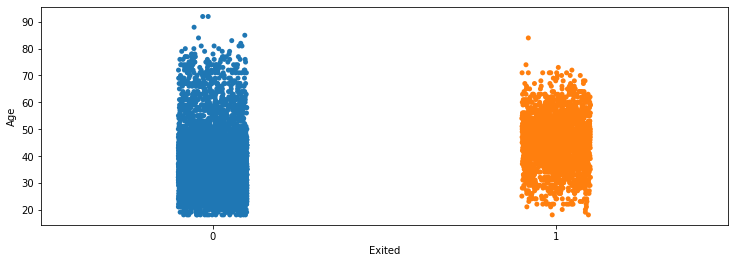

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plt.subplot(7,2,1)
sns.stripplot(y,df['Age'])
plt.tight_layout()

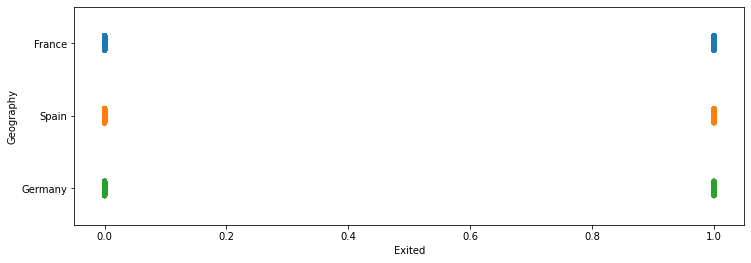

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plt.subplot(7,2,1)
sns.stripplot(y,df['Geography'])
plt.tight_layout()

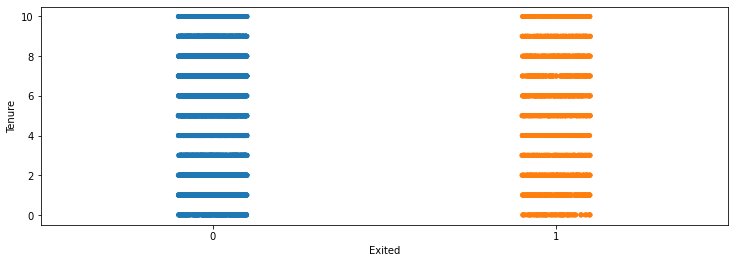

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plt.subplot(7,2,1)
sns.stripplot(y,df['Tenure'])
plt.tight_layout()

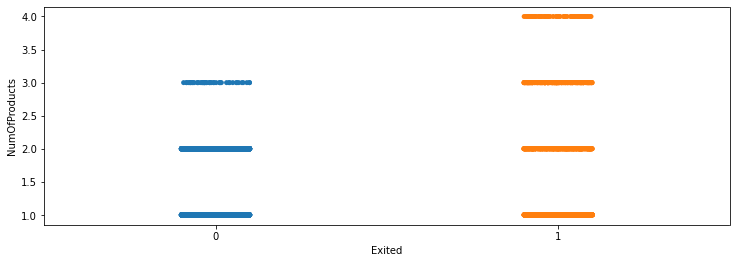

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plt.subplot(7,2,1)
sns.stripplot(y,df['NumOfProducts'])
plt.tight_layout()

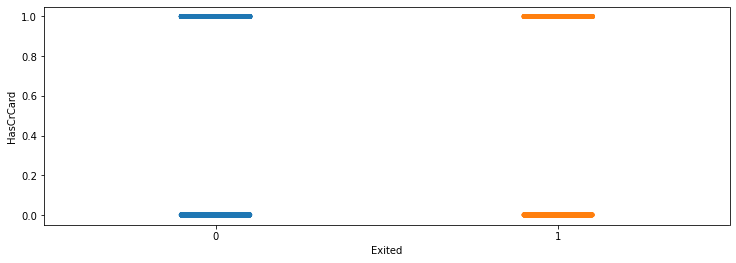

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plt.subplot(7,2,1)
sns.stripplot(y,df['HasCrCard'])
plt.tight_layout()

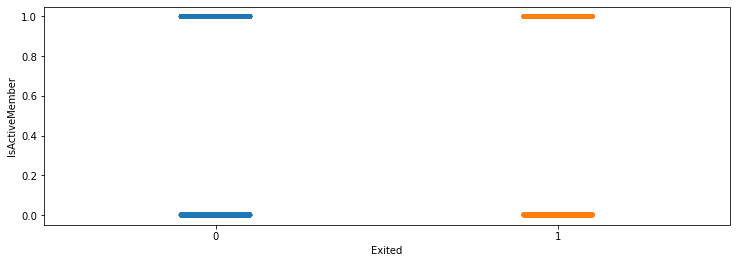

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plt.subplot(7,2,1)
sns.stripplot(y,df['IsActiveMember'])
plt.tight_layout()

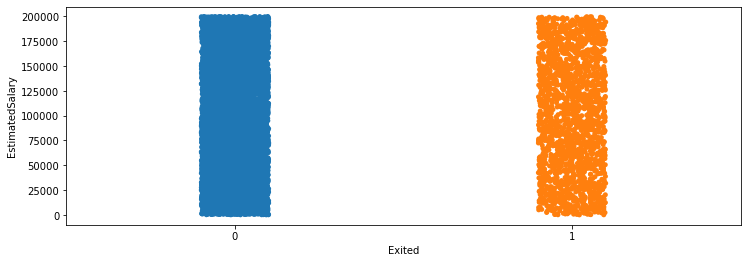

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plt.subplot(7,2,1)
sns.stripplot(y,df['EstimatedSalary'])
plt.tight_layout()

### Graphical Analysis between dependent and independent features

<AxesSubplot:xlabel='CreditScore', ylabel='Exited'>

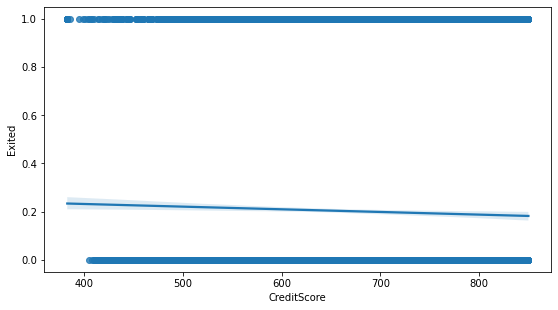

In [ ]:
plt.figure(figsize=(20,40))
plt.subplot(7,2,1)
sns.regplot(df1['CreditScore'],df1['Exited'])

<AxesSubplot:xlabel='Age', ylabel='Exited'>

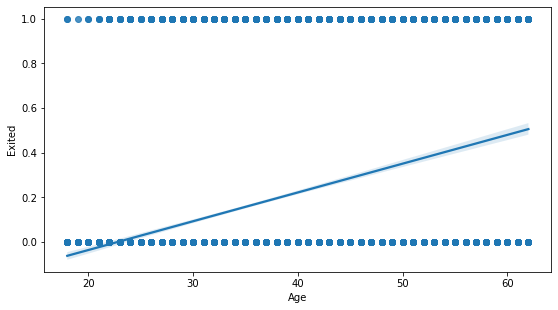

In [ ]:
plt.figure(figsize=(20,40))
plt.subplot(7,2,2)
sns.regplot(df1['Age'],df1['Exited'])

<AxesSubplot:xlabel='Tenure', ylabel='Exited'>

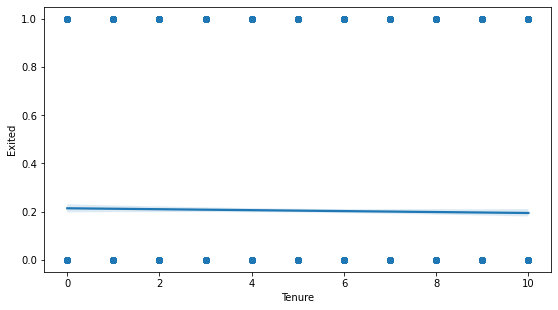

In [ ]:
plt.figure(figsize=(20,40))
plt.subplot(7,2,1)
sns.regplot(df1['Tenure'],df1['Exited'])

<AxesSubplot:xlabel='NumOfProducts', ylabel='Exited'>

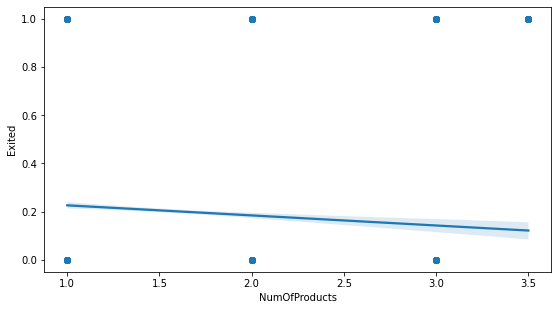

In [ ]:
plt.figure(figsize=(20,40))
plt.subplot(7,2,1)
sns.regplot(df1['NumOfProducts'],df1['Exited'])

<AxesSubplot:xlabel='HasCrCard', ylabel='Exited'>

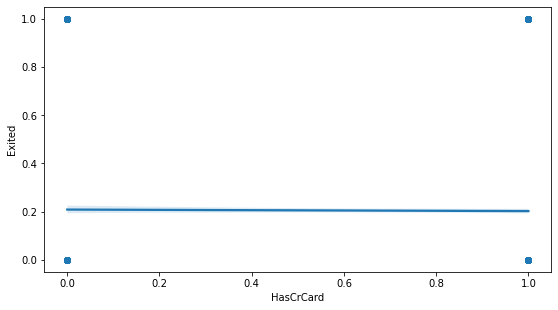

In [ ]:
plt.figure(figsize=(20,40))
plt.subplot(7,2,1)
sns.regplot(df1['HasCrCard'],df1['Exited'])

<AxesSubplot:xlabel='IsActiveMember', ylabel='Exited'>

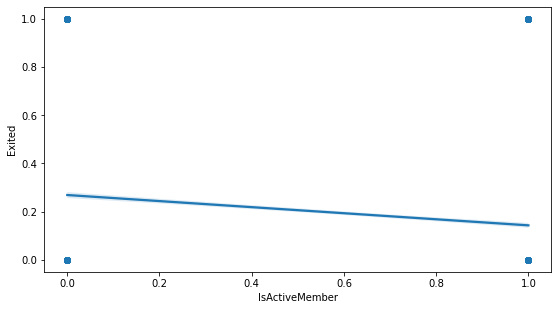

In [ ]:
plt.figure(figsize=(20,40))
plt.subplot(7,2,1)
sns.regplot(df1['IsActiveMember'],df1['Exited'])

<AxesSubplot:xlabel='Balance', ylabel='Exited'>

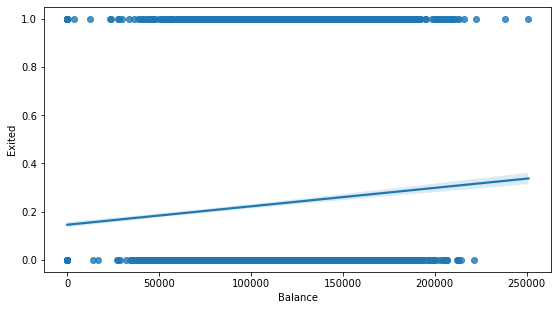

In [ ]:
plt.figure(figsize=(20,40))
plt.subplot(7,2,1)
sns.regplot(df1['Balance'],df1['Exited'])

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Exited'>

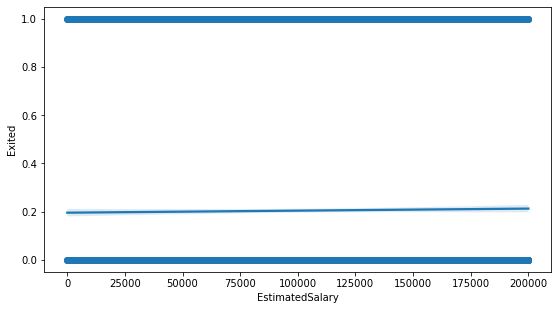

In [ ]:
plt.figure(figsize=(20,40))
plt.subplot(7,2,1)
sns.regplot(df1['EstimatedSalary'],df1['Exited'])

#### Handling Categorical Values

Labling the categorical variables with more than two unique values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dummy_columns = [] #array for multiple value columns

for column in df.columns:
    if df[column].dtype == object:
        if df[column].nunique() == 2:
            #apply Label Encoder for binary ones
            df[column] = le.fit_transform(df[column]) 
        else:
            dummy_columns.append(column)

#apply get dummies for selected columns
df = pd.get_dummies(data = df,columns = dummy_columns) 

### Training the Data

In [ ]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=16)

In [ ]:
X_train.shape,y_train.shape

((8500, 12), (8500,))

In [ ]:
X_test.shape,y_test.shape

((1500, 12), (1500,))

In [ ]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


### Scaler Method

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 2.06925718,  0.91381642,  0.01680968, ..., -1.01207287,
         1.74243719, -0.57155398],
       [ 0.98986304,  0.91381642, -1.41487688, ...,  0.98807114,
        -0.57390878, -0.57155398],
       [ 0.27372654, -1.0943117 ,  1.63938779, ...,  0.98807114,
        -0.57390878, -0.57155398],
       ...,
       [-0.45278875, -1.0943117 , -0.55586494, ..., -1.01207287,
        -0.57390878,  1.74961603],
       [ 1.27009036,  0.91381642,  0.39859277, ..., -1.01207287,
         1.74243719, -0.57155398],
       [-1.26233436, -1.0943117 ,  0.49403854, ..., -1.01207287,
        -0.57390878,  1.74961603]])

In [ ]:
X_test=scaler.transform(X_test)
X_test

array([[-2.16528907,  0.91381642, -0.46041917, ...,  0.98807114,
        -0.57390878, -0.57155398],
       [-0.20369779,  0.91381642, -1.12853957, ..., -1.01207287,
        -0.57390878,  1.74961603],
       [-1.00286461,  0.91381642,  0.68493008, ..., -1.01207287,
        -0.57390878,  1.74961603],
       ...,
       [ 0.54357508,  0.91381642,  1.06671316, ...,  0.98807114,
        -0.57390878, -0.57155398],
       [ 0.30486291, -1.0943117 , -1.31943111, ...,  0.98807114,
        -0.57390878, -0.57155398],
       [-0.54619786,  0.91381642, -0.46041917, ..., -1.01207287,
        -0.57390878,  1.74961603]])

## Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [ ]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
score=accuracy_score(y_pred,y_test)
score

0.8073333333333333

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89      1373
           1       0.25      0.63      0.36       127

    accuracy                           0.81      1500
   macro avg       0.60      0.73      0.62      1500
weighted avg       0.90      0.81      0.84      1500



## Support Vector Classification Model

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
score=accuracy_score(y_pred,y_test)
score

0.7853333333333333

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      1500
           1       0.00      0.00      0.00         0

    accuracy                           0.79      1500
   macro avg       0.50      0.39      0.44      1500
weighted avg       1.00      0.79      0.88      1500



## Decision Tree Classifier Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

treemodel=DecisionTreeClassifier()
treemodel.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.66114020986472, 0.9814814814814815, 'X[2] <= 0.351\ngini = 0.322\nsamples = 8500\nvalue = [6785, 1715]'),
 Text(0.4790283503157975, 0.9444444444444444, 'X[5] <= 1.653\ngini = 0.208\nsamples = 6065\nvalue = [5349, 716]'),
 Text(0.36578062813855183, 0.9074074074074074, 'X[5] <= -0.063\ngini = 0.186\nsamples = 5927\nvalue = [5312, 615]'),
 Text(0.24449332583200317, 0.8703703703703703, 'X[10] <= 0.584\ngini = 0.278\nsamples = 2910\nvalue = [2424, 486]'),
 Text(0.1527157632993375, 0.8333333333333334, 'X[4] <= -0.01\ngini = 0.232\nsamples = 2201\nvalue = [1906, 295]'),
 Text(0.06778742248527397, 0.7962962962962963, 'X[2] <= 0.065\ngini = 0.36\nsamples = 603\nvalue = [461, 142]'),
 Text(0.04432288503100589, 0.7592592592592593, 'X[0] <= -2.508\ngini = 0.325\nsamples = 480\nvalue = [382, 98]'),
 Text(0.04341884084584634, 0.7222222222222222, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.04522692921616544, 0.7222222222222222, 'X[7] <= -0.03\ngini = 0.321\nsamples = 478\nvalue = [382

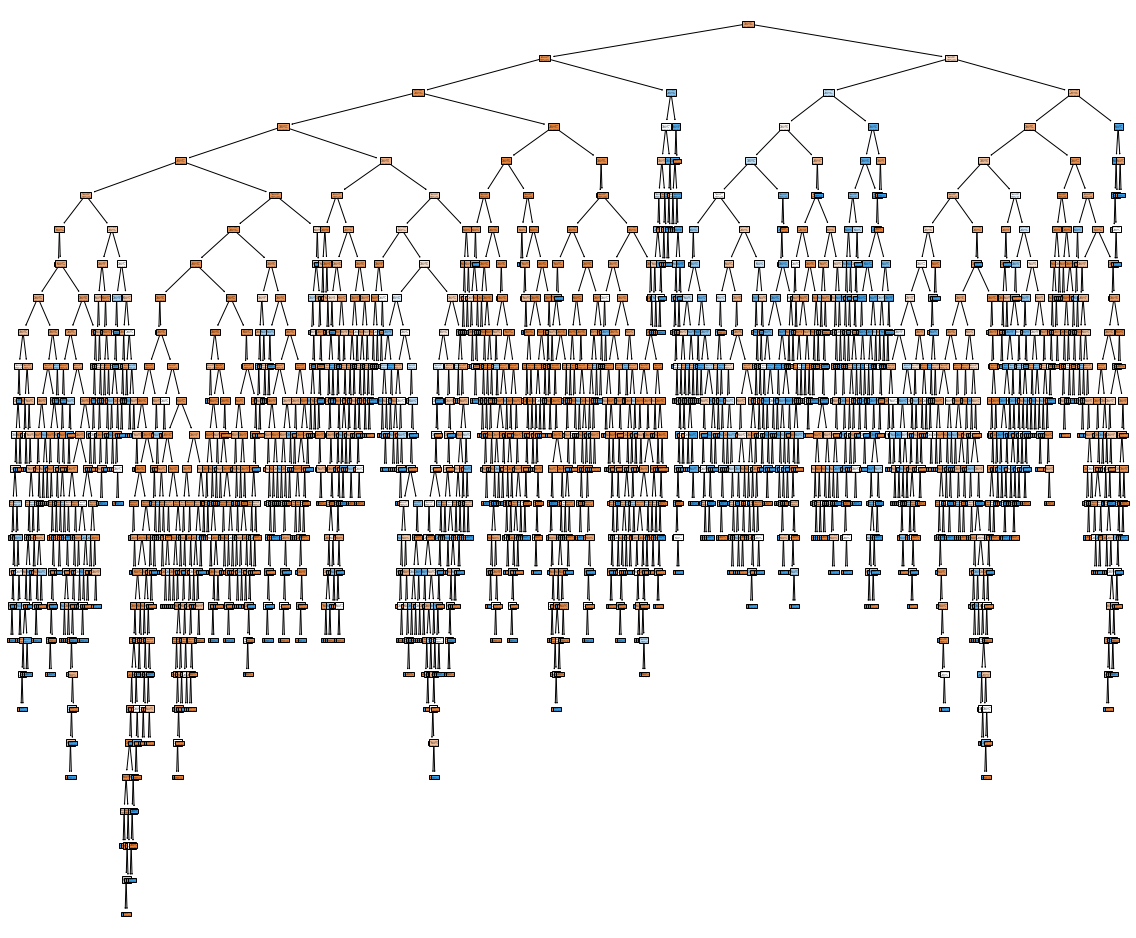

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,17))
tree.plot_tree(treemodel,filled=True)

In [ ]:
y_pred=treemodel.predict(X_test)


In [ ]:
score=accuracy_score(y_pred,y_test)
score

0.7773333333333333

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1168
           1       0.50      0.48      0.49       332

    accuracy                           0.78      1500
   macro avg       0.68      0.67      0.67      1500
weighted avg       0.77      0.78      0.78      1500



## Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(n_estimators=50)

In [ ]:
randomforest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred=randomforest.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
score=accuracy_score(y_pred,y_test)
score

0.8546666666666667

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1294
           1       0.48      0.75      0.59       206

    accuracy                           0.85      1500
   macro avg       0.72      0.81      0.75      1500
weighted avg       0.89      0.85      0.87      1500



## Ensemble Model Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
BC=BaggingClassifier(base_estimator=None,n_estimators=10,max_samples=1.0,max_features=1.0,bootstrap=True,bootstrap_features=False)

In [ ]:
BC.fit(X_train,y_train)

BaggingClassifier()

In [ ]:
y_pred=BC.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
score=accuracy_score(y_pred,y_test)
score

0.8373333333333334

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1288
           1       0.45      0.68      0.54       212

    accuracy                           0.84      1500
   macro avg       0.70      0.77      0.72      1500
weighted avg       0.87      0.84      0.85      1500



## Adaboost Classifier Model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
acm=AdaBoostClassifier(n_estimators=100,random_state=0)

In [ ]:
acm.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
y_pred=acm.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
score=accuracy_score(y_pred,y_test)
score


0.846

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1281
           1       0.48      0.71      0.57       219

    accuracy                           0.85      1500
   macro avg       0.71      0.79      0.74      1500
weighted avg       0.88      0.85      0.86      1500



## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0)

In [ ]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
y_pred=gbc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
score=accuracy_score(y_pred,y_test)
score

0.8506666666666667

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1276
           1       0.50      0.72      0.59       224

    accuracy                           0.85      1500
   macro avg       0.72      0.80      0.75      1500
weighted avg       0.88      0.85      0.86      1500



## XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred=xgb.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
score=accuracy_score(y_pred,y_test)
score

0.8453333333333334

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1262
           1       0.51      0.69      0.59       238

    accuracy                           0.85      1500
   macro avg       0.72      0.78      0.75      1500
weighted avg       0.87      0.85      0.85      1500



## Building the model with Random Forest Classification

In [ ]:
import pickle

In [ ]:
filename = 'model.sav'

In [ ]:
pickle.dump(randomforest,open(filename,'wb'))

In [ ]:
load_model=pickle.load(open(filename,'rb'))

In [ ]:
load_model.score(X_test,y_test)

0.8546666666666667

In [ ]:
x=df

In [ ]:
print(x)

      CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619       0   42       2       0.00              1          1   
1             608       0   41       1   83807.86              1          0   
2             502       0   42       8  159660.80              3          1   
3             699       0   39       1       0.00              2          0   
4             850       0   43       2  125510.82              1          1   
...           ...     ...  ...     ...        ...            ...        ...   
9995          771       1   39       5       0.00              2          1   
9996          516       1   35      10   57369.61              1          1   
9997          709       0   36       7       0.00              1          0   
9998          772       1   42       3   75075.31              2          1   
9999          792       0   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geog

In [ ]:
ans=[[609,1,25,5,60450,5,1,1,185245,0,1,0]]

In [ ]:
load_model.predict(ans)

array([1], dtype=int64)